In [19]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from tqdm.auto import tqdm as tqdm
tqdm.pandas(desc="Progress")

In [20]:
# Metadata
header_rows = 3
engine='pyarrow'
input_file = "DATA.CSV"

In [21]:
# Load data
df = pd.read_csv(input_file, header=header_rows, engine=engine)

In [22]:
df["_time"] = pd.to_datetime(df["_time"], unit="ms")

In [23]:
data = df[["_time", "_field", "_value"]].set_index(["_time","_field"]).unstack().droplevel(0, axis=1)

In [24]:
data

_field,Acc x,Acc y,Acc z,B,DHT hum,DHT temp,G,Gyro x,Gyro y,Gyro z,Humidity,Intensity,Mag x,Mag y,Mag z,PDM,Pressure,Proximity,R,Temperature
_time,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:05.051,-0.01,-1.01,-0.09,255.0,38.5,26.9,0.0,0.55,0.37,0.37,44.42,255.0,-4.21,85.74,-27.71,-56.25,1014.39,0.0,0.0,27.92
1970-01-01 00:00:05.825,-0.01,-1.01,-0.09,255.0,38.5,26.9,0.0,0.73,0.55,0.37,44.05,255.0,-4.53,85.28,-26.95,-33.50,1011.88,0.0,0.0,28.24
1970-01-01 00:00:06.474,-0.00,-1.01,-0.09,255.0,38.5,26.9,0.0,0.49,0.49,0.31,44.12,255.0,-4.27,85.50,-26.87,-8.25,1014.40,0.0,0.0,28.25
1970-01-01 00:00:07.129,-0.00,-1.01,-0.09,255.0,38.5,26.9,0.0,0.43,0.49,0.31,44.08,255.0,-4.69,86.27,-28.22,-5.75,1014.38,0.0,0.0,28.33
1970-01-01 00:00:07.785,-0.00,-1.01,-0.09,255.0,38.5,26.9,0.0,0.49,0.49,0.37,44.05,255.0,-5.04,85.64,-27.95,-24.25,1014.37,0.0,0.0,28.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 11:00:59.280,-0.01,-1.01,-0.09,255.0,36.5,26.2,0.0,0.49,0.43,0.00,34.93,255.0,-7.02,87.21,-26.97,-13.50,1013.29,0.0,0.0,31.85
1970-01-01 11:00:59.921,-0.01,-1.01,-0.09,255.0,36.5,26.2,0.0,0.61,0.49,0.12,34.91,255.0,-8.22,87.18,-27.47,17.00,1013.30,0.0,0.0,31.87
1970-01-01 11:01:00.567,-0.01,-1.01,-0.09,255.0,36.5,26.2,0.0,0.61,0.43,0.06,34.95,255.0,-8.98,87.24,-27.71,-53.50,1013.26,0.0,0.0,31.80


# IMU

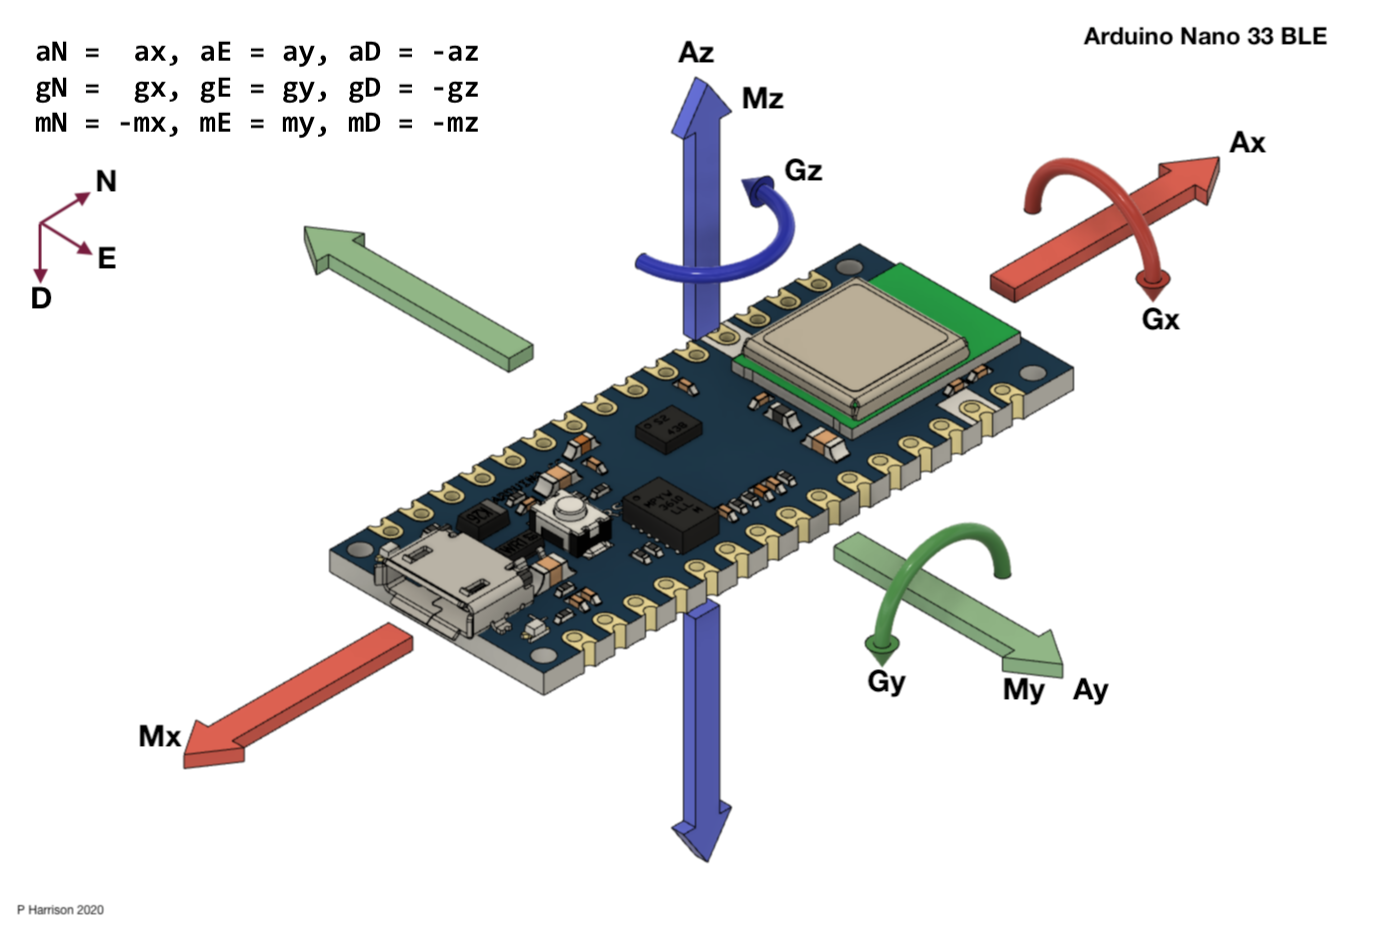

In [121]:
display(Image("Arduino_axis.PNG", retina=True))

Acc & Gyro: (x, y, z)->(y, x, z)

Mag: (x, y, z)->(y, -x, z)

In [122]:
def swap_xy(array):
    return np.array([array[1], array[0], array[2]])

def invert_axis(array, axis):
    array[axis] = -array[axis]
    return array

In [123]:
# Plotting functions
def plot_vector(vector, fig, ax):
    # Clear the previous plot
    ax.cla()

    # Define the canonical basis vectors
    basis_vectors = np.identity(3)

    # Plot the basis vectors as lines from the origin
    for basis_vector in basis_vectors:
        ax.quiver(0, 0, 0, basis_vector[0], basis_vector[1], basis_vector[2], color='k', arrow_length_ratio=0.1)

    # Extract the vector components
    x, y, z = vector

    # Plot the vector as an arrow from the origin
    ax.quiver(0, 0, 0, x, y, z, color='r', arrow_length_ratio=0.1)

    # Set labels and limits
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])

    # Show the plot
    plt.show()
    plt.pause(0.0)

In [124]:
# Vector rotation functions
def compute_rotation_matrix(v1, v2):
    # Normalize the input vectors
    v1_norm = v1 / np.linalg.norm(v1)
    v2_norm = v2 / np.linalg.norm(v2)

    # Calculate the axis of rotation
    axis = np.cross(v1_norm, v2_norm)

    # Calculate the angle of rotation
    angle = np.arccos(np.dot(v1_norm, v2_norm))

    # Create the skew-symmetric matrix of the axis of rotation
    K = np.array([[0, -axis[2], axis[1]],
                  [axis[2], 0, -axis[0]],
                  [-axis[1], axis[0], 0]])

    # Create the rotation matrix using Rodrigues' rotation formula
    R = np.identity(3) + np.sin(angle) * K + (1 - np.cos(angle)) * np.dot(K, K)

    return R

def update_rotation_matrix(gyro, dt, prev_rotation_matrix):
    wx, wy, wz = gyro
    # Compute rotation matrix from angular velocity
    skew_symmetric_matrix = np.array([[0, -wz, wy],
                                      [wz, 0, -wx],
                                      [-wy, wx, 0]])
    
    rotation_matrix = np.identity(3) + dt * skew_symmetric_matrix

    # Apply correction for maintaining unitarity
    rotation_matrix, _ = np.linalg.qr(rotation_matrix)
    
    # Update rotation matrix using previous rotation matrix
    updated_rotation_matrix = np.dot(rotation_matrix, prev_rotation_matrix)

    return updated_rotation_matrix

def rotate_matrix_about_z(matrix, angle):
    rotation_matrix_z = np.array([[np.cos(angle), -np.sin(angle), 0],
                                  [np.sin(angle), np.cos(angle), 0],
                                  [0, 0, 1]])
    
    rotated_matrix = np.dot(rotation_matrix_z, matrix)

    return rotated_matrix

In [125]:
# Resolution constants
accelerometer_resolution = 0
gyroscope_resolution = 0
magnetometer_resolution = 0

# Calibration constants
accelerometer_offsets = np.array([0.0, 0.0, 0.0])
gyroscope_offsets = np.array([0.0, 0.0, 0.0])
magnetometer_offsets = np.array([0.0, 0.0, 0.0])
north_correction = 0
gravity_scale = 1

def calibrate_sensors(sensor_data, window=10):
    global accelerometer_offsets
    global gyroscope_offsets
    global magnetometer_offsets
    global gravity_scale
    global north_correction
    
    gravity = np.array([0.0, 0.0, -1.0])
    
    start = sensor_data.index[0]+pd.Timedelta(seconds=1)
    end = start+pd.Timedelta(seconds=window)
    offsets = sensor_data.loc[start:end].describe().T
    mean_offsets = offsets["mean"]
    print(f"Raw offsets:\n{offsets.to_string()}\n")
    
    raw_accelerometer = mean_offsets[["Acc x","Acc y","Acc z"]].to_numpy() # Raw acceleration readings
    initial_rotation_matrix = compute_rotation_matrix(raw_accelerometer, gravity)
    inverse_rotation_matrix = compute_rotation_matrix(gravity, raw_accelerometer)
    inverse_rotated_gravity = np.dot(inverse_rotation_matrix, gravity)
    
    # Rorations induce numerical errors. 
    # Rotating gravity back to cannonical coordinates and taking its new norm as a scalling factor reduces those errors later on.
    rotated_gravity = np.dot(initial_rotation_matrix, inverse_rotated_gravity)
    gravity_scale = np.linalg.norm(rotated_gravity)
    print(f"Gravity scale {gravity_scale}")
    
    accelerometer_offsets = raw_accelerometer - inverse_rotated_gravity
    print(f"Accelerometer offsets: {accelerometer_offsets} g")
    
    gyroscope_offsets = mean_offsets[["Gyro x", "Gyro y", "Gyro z"]].to_numpy()
    print(f"Gyroscope offsets: {gyroscope_offsets} deg/s")
    
    initial_magnetometer = mean_offsets[["Mag x", "Mag y", "Mag z"]].to_numpy()
    # print(f"Magnetometer offsets: {magnetometer_offsets}")
    
    # Align the magnetometer axis with the Arduino axis
    aligned_magnetometer = invert_axis(swap_xy(initial_magnetometer), 1)

    # Rotate the magnetic field vector into the canonical XYZ coordinates
    rotated_mag = np.dot(initial_rotation_matrix, aligned_magnetometer) / np.linalg.norm(aligned_magnetometer)
    
    # Calculate azimuthal angle between magnetic north and y-axis
    north_correction = - np.arctan2(rotated_mag[1], rotated_mag[0])
    print(f"North correction: {north_correction} rad")

In [126]:
def process_sensor_data(sensor_data, plot = False, start = pd.Timedelta(seconds = 0)):
    position_list = [np.array([0.0, 0.0, 0.0])]  # List to store the calculated positions
    velocity_list = [np.array([0.0, 0.0, 0.0])]
    acceleration_list = [np.array([0.0, 0.0, 0.0])]
    
    gravity = np.array([0, 0, -1])  # Define gravity vector
    start = sensor_data.index[0]+start
    sensor_data = sensor_data.loc[start:]
    
    # Create a figure and a 3D axis
    if plot:
        fig = plt.figure()
        axes = fig.add_subplot(111, projection='3d')
    
    for idx, (timestamp, row) in enumerate(tqdm(sensor_data.iterrows(), total=sensor_data.shape[0])):
        ax = row["Acc x"]
        ay = row["Acc y"]
        az = row["Acc z"]
        wx = row["Gyro x"]
        wy = row["Gyro y"]
        wz = row["Gyro z"]
        mx = row["Mag x"]
        my = row["Mag y"]
        mz = row["Mag z"]

        # Apply calibration offsets to accelerometer and gyroscope readings
        ax -= accelerometer_offsets[0]
        ay -= accelerometer_offsets[1]
        az -= accelerometer_offsets[2]
        wx -= gyroscope_offsets[0]
        wy -= gyroscope_offsets[1]
        wz -= gyroscope_offsets[2]
        mx -= magnetometer_offsets[0]
        my -= magnetometer_offsets[1]
        mz -= magnetometer_offsets[2]

        acc = np.array([ay, ax, az])  # Raw acceleration readings / Need to swap x and y to form right handed basis
        
        # Convert gyroscope readings to rad/s
        wx = np.radians(wx)
        wy = np.radians(wy)
        wz = np.radians(wz)
        
        gyro = np.array([wy, wx, wz]) # Raw gyro readings / Need to swap x and y to form right handed basis
        
        mag = np.array([my, -mx, mz]) # Raw magnetometer readings / Need to swap x and y to form right handed basis
        
        if idx == 0:
            # Initialize first timestamp and rotation matrix
            prev_timestamp = timestamp
            prev_rotation_matrix = compute_rotation_matrix(acc, gravity)
            prev_acc = acc
            prev_gyro = gyro
            prev_mag = mag
            
            continue
        
        if all(abs(acc - prev_acc)<accelerometer_resolution):
            mean_acceleration = prev_acc
        else:
            mean_acceleration = (acc + prev_acc) / 2
            prev_acc = acc
            
        if all(abs(gyro - prev_gyro)<gyroscope_resolution):
            mean_gyro = prev_gyro
        else:
            mean_gyro = (gyro + prev_gyro) / 2
            prev_gyro = gyro
             
        if all(abs(mag - prev_mag)<magnetometer_resolution):
            mean_mag = prev_mag
        else:
            mean_mag = (mag + prev_mag) / 2
            prev_mag = mag
        
        # Convert timestamp to time in seconds
        dt = (timestamp - prev_timestamp) / pd.Timedelta(seconds=1)
        prev_timestamp = timestamp

        # Update rotation matrix using gyroscope readings
        rotation_matrix = update_rotation_matrix(mean_gyro, dt, prev_rotation_matrix)
               
        if plot and not np.array_equal(rotation_matrix, prev_rotation_matrix):
            plot_vector(rotation_matrix[:,2], fig, axes)
            
        prev_rotation_matrix = rotation_matrix
        
        # # Rotate the magnetic field vector into the canonical XYZ coordinates
        # rotated_mag = np.dot(rotation_matrix, mean_mag) / np.linalg.norm(mean_mag)
        
        # # Calculate azimuthal angle between magnetic north and y-axis
        # north_correction = - np.arctan2(rotated_mag[1], rotated_mag[0])

        # Apply north correction to rotation matrix
        rotation_matrix = rotate_matrix_about_z(rotation_matrix, north_correction)

        # Rotate the linear acceleration vector into the canonical XYZ coordinates
        rotated_acceleration = np.dot(rotation_matrix, mean_acceleration)
        
        # Remove gravity component from acceleration
        normalized_acceleration = rotated_acceleration - gravity * gravity_scale
        acceleration = normalized_acceleration * 9.81 #m/s^2
        acceleration_list.append(acceleration)

        # Integrate the rotated linear acceleration to determine velocity
        velocity = np.mean(acceleration_list[-2:], axis=0) * dt + velocity_list[-1]
        velocity_list.append(velocity)

        # Integrate velocity to determine position
        position = np.mean(velocity_list[-2:], axis=0) * dt + position_list[-1]
        position_list.append(position)

    # Create a pandas DataFrame from the positions list
    df = pd.DataFrame(np.concatenate((acceleration_list,velocity_list,position_list), axis=1), columns=["ax", "ay", "az", "vx", "vy", "vz", "px", "py", "pz"], index = sensor_data.index)

    return df

In [127]:
calibrate_sensors(data, window=10)

Raw offsets:
             count         mean           std      min       25%      50%       75%      max
_field                                                                                      
Acc x         15.0    -0.004000  5.070926e-03    -0.01    -0.010     0.00    -0.000    -0.00
Acc y         15.0    -1.010000  0.000000e+00    -1.01    -1.010    -1.01    -1.010    -1.01
Acc z         15.0    -0.090000  1.436488e-17    -0.09    -0.090    -0.09    -0.090    -0.09
B             15.0   255.000000  0.000000e+00   255.00   255.000   255.00   255.000   255.00
DHT hum       15.0    38.500000  0.000000e+00    38.50    38.500    38.50    38.500    38.50
DHT temp      15.0    26.900000  7.354816e-15    26.90    26.900    26.90    26.900    26.90
G             15.0     0.000000  0.000000e+00     0.00     0.000     0.00     0.000     0.00
Gyro x        15.0     0.494000  1.000571e-01     0.31     0.430     0.49     0.610     0.61
Gyro y        15.0     0.498000  7.475675e-02     0.37   

In [128]:
smooth_data = data.rolling(window=5, min_periods=1, center=True).median().drop_duplicates()

In [129]:
xyz = process_sensor_data(smooth_data, plot = False, start=pd.Timedelta(seconds=5))
# xyz = process_sensor_data(data, plot = False, start = pd.Timedelta(seconds=10))

  0%|          | 0/59882 [00:00<?, ?it/s]

## Acceleration

<AxesSubplot: xlabel='_time'>

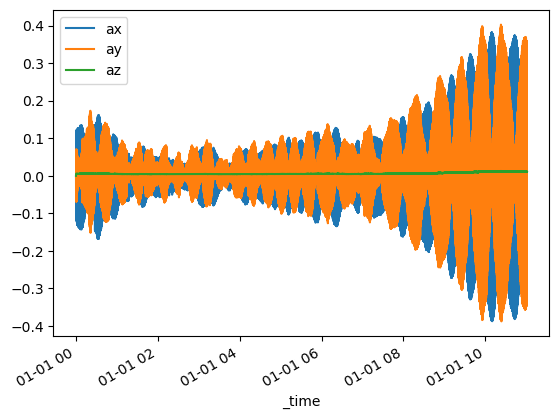

In [130]:
xyz.filter(like="a").plot()

In [105]:
xyz.filter(like="a").mean()

ax   -0.002971
ay    0.006269
az    0.006124
dtype: float64

## Velocity

<AxesSubplot: xlabel='_time'>

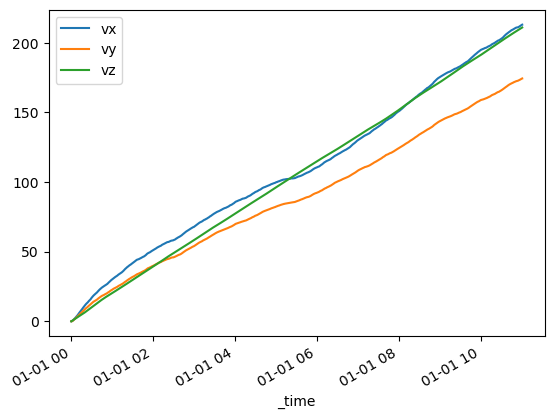

In [36]:
xyz.filter(like="v").plot()

In [236]:
xyz.filter(like="v").sum()

vx    7.205453e+06
vy    5.651839e+06
vz    4.564076e+07
dtype: float64

## Position

<AxesSubplot: xlabel='_time'>

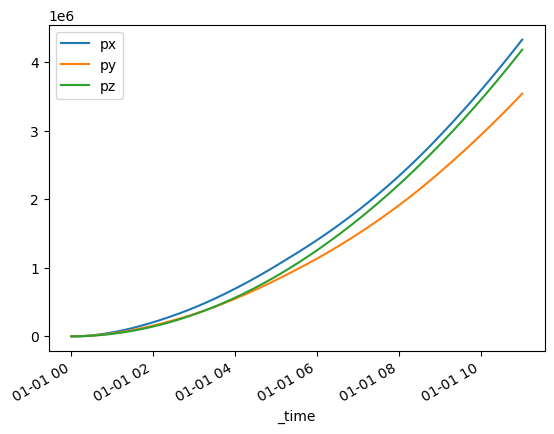

In [34]:
xyz.filter(like="p").plot()

In [35]:
xyz.filter(like="p").sum()

px    9.068115e+10
py    7.366676e+10
pz    8.405856e+10
dtype: float64

## Raw data 

### Accelerometer

<AxesSubplot: xlabel='_time'>

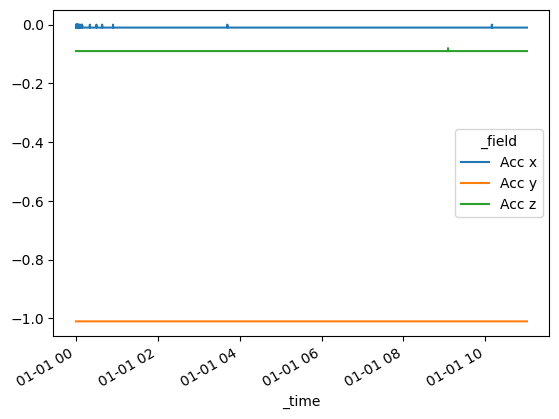

In [100]:
data.filter(like = "Acc").plot()

<AxesSubplot: xlabel='_time'>

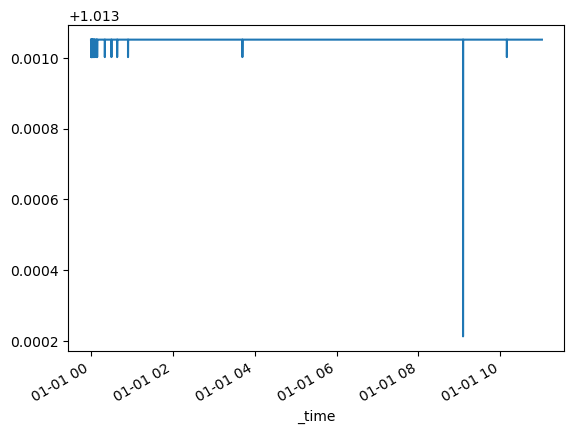

In [101]:
data.filter(like = "Acc").apply(np.linalg.norm, axis=1).plot()

### Gyroscope

In [ ]:
data.filter(like = "Gyro").plot(logx=True)

In [ ]:
data.filter(like = "Gyro").apply(np.linalg.norm, axis=1).plot()

### Magnetometer

In [ ]:
data.filter(like = "Mag").plot()

In [ ]:
data.filter(like = "Mag").apply(np.linalg.norm, axis=1).plot()

In [ ]:
import os
from influxdb_client import InfluxDBClient, Point, WritePrecision
from influxdb_client.client.write_api import SYNCHRONOUS

token = os.environ.get("INFLUXDB_TOKEN")
org = "Synology"
bucket = "Arduino"

# with InfluxDBClient(url="http://ds220plus.local:8086", token=token, org=org) as client: